In [1]:
# import matplotlib
# matplotlib.use('TkAgg')
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.python.tools import inspect_checkpoint as chkp
import os

MODEL_SAVE_PATH = "Reg_Model"
MODEL_NAME = "model.ckpt"
SUMMARY_PATH = "Reg_Logs"

# 随机生成若干个点，围绕在y=0.1x+0.3的直线周围
num_points = 100
vectors_set = []
for i in range(num_points):
    x1 = np.random.normal(0.0, 0.55)
    y1 = x1 * 0.1 + 0.3 + np.random.normal(0.0, 0.03)
    vectors_set.append([x1, y1])

# 生成一些样本
x_data = [v[0] for v in vectors_set]
y_data = [v[1] for v in vectors_set]

plt.scatter(x_data, y_data, c='r')
plt.show()

<Figure size 640x480 with 1 Axes>

# Define the model and do the first training

In [2]:
# 生成1维W矩阵，取值是[-1, 1]之间的随机数
W = tf.Variable(tf.random_uniform([1], -1.0, 1.0), name='W')
# 生成1维b矩阵，初始值是0
b = tf.Variable(tf.zeros([1]), name='b')
# 经过计算取得预估值y
x = tf.placeholder(tf.float32, name= "input")
y = tf.add(tf.multiply(W, x_data), b, name= "output")

# 以预估值y和实际值y_data之间的均方误差作为损失
loss = tf.reduce_mean(tf.square(y - y_data), name='loss')
# 采用梯度下降法来优化参数
optimizer = tf.train.GradientDescentOptimizer(0.5)
# 训练的过程就是最小化这个误差值
train = optimizer.minimize(loss, name='train')

sess = tf.Session()        #这种定义session的方法也可以，但是不推荐。
init = tf.global_variables_initializer()
sess.run(init)

# 初始化的w和b是多少
print("before training: ")
print("W=", sess.run(W), "b=", sess.run(b), "loss=", sess.run(loss))
# 执行20次训练
for step in range(5):
    sess.run(train, feed_dict={x: x_data})


before training: 
W= [-0.9121053] b= [0.] loss= 0.39007932


# save the model for the first time

In [3]:
saver = tf.train.Saver()
saver.save(sess, os.path.join(MODEL_SAVE_PATH, MODEL_NAME))
saver.export_meta_graph(os.path.join(MODEL_SAVE_PATH, MODEL_NAME) + ".json", as_text=True)
writer = tf.summary.FileWriter(os.path.join(SUMMARY_PATH, "original"), 
                               tf.get_default_graph())
chkp.print_tensors_in_checkpoint_file(os.path.join(MODEL_SAVE_PATH, MODEL_NAME),
                                      tensor_name='',
                                      all_tensors=True)

tensor_name:  W
[-0.11823598]
tensor_name:  b
[0.31116045]


# retrain the model

INFO:tensorflow:Restoring parameters from Reg_Model/model.ckpt


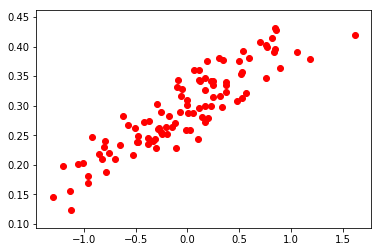

tensor_name:  W
[0.05457118]
tensor_name:  b
[0.29906148]


In [4]:
model = os.path.join(MODEL_SAVE_PATH, MODEL_NAME)
saver = tf.train.import_meta_graph(model + '.meta',
                                   clear_devices=True)

with tf.Session() as sess:
    saver.restore(sess, model)  # 恢复图并得到数据
    graph = tf.get_default_graph()
    x = graph.get_tensor_by_name("input:0")
    train_op = graph.get_operation_by_name("train")

    # 随机生成若干个点，围绕在y=0.1x+0.3的直线周围
    num_points = 100
    vectors_set = []
    for i in range(num_points):
        x1 = np.random.normal(0.0, 0.55)
        y1 = x1 * 0.1 + 0.3 + np.random.normal(0.0, 0.03)
        vectors_set.append([x1, y1])
    # 生成一些样本
    x_data1 = [v[0] for v in vectors_set]
    y_data1 = [v[1] for v in vectors_set]

    plt.scatter(x_data1, y_data1, c='r')
    plt.show()

    for step in range(5):
        sess.run(train, feed_dict={x: x_data1})

    saver.save(sess, model + "_retrained")
    saver.export_meta_graph(model + "_retrained" + ".json", as_text=True)
    writer = tf.summary.FileWriter(os.path.join(SUMMARY_PATH, "retrained"), 
                               tf.get_default_graph())

chkp.print_tensors_in_checkpoint_file(os.path.join(MODEL_SAVE_PATH, MODEL_NAME + "_retrained"),
                                      tensor_name='',
                                      all_tensors=True)

-------------------------